In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def read_keff_h5(file, step):
    db = tb.open_file(file, mode='r')
    sim_param = db.root.simulation_parameters
    # Keff at t=0 depletion step
    k_0 = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
    k_0_e = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
    # Keff at t=end depletion step
    k_1 = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
    k_1_e = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])
    db.close()
    day = step*np.arange(len(k_0))
    return day, k_0, k_1, k_0_e, k_1_e

In [8]:
db_file_5d = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu/db_saltproc_5d_4735d.h5'
step_5d = 5.0/365.0 # days --> EFPY
days_5d, k_bds_5d, k_eds_5d, k_bds_err_5d, k_eds_err_5d = read_keff_h5(db_file_5d, step_5d)

In [9]:
#db_file = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/feed_leu_19.79/db_saltproc.h5'
db_file = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu/db_saltproc_30d_4890d.h5'

step_30d = 30.0/365.0 # days

days_30, k_bds_30, k_eds_30, k_bds_err_30, k_eds_err_30 = read_keff_h5(db_file, step_30d)

#days2 = np.linspace(step, (len(k_eds))*(step), num=len(k_eds), endpoint=True)

In [ ]:
db_file_5leu = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/feed_leu_5/db_saltproc.h5'
step3 = 3.0/365.0

db_5leu = tb.open_file(db_file_5leu, mode='r')

sim_param_5leu = db_5leu.root.simulation_parameters
# Keff at t=0 depletion step
k_bds_5 = np.array([x['keff_bds'][0] for x in sim_param_5leu.iterrows()])
k_bds_err_5 = np.array([x['keff_bds'][1] for x in sim_param_5leu.iterrows()])
# Keff at t=end depletion step
k_eds_5 = np.array([x['keff_eds'][0] for x in sim_param_5leu.iterrows()])
k_eds_err_5 = np.array([x['keff_eds'][1] for x in sim_param_5leu.iterrows()])

db_5leu.close()

days_5 = step3*np.arange(len(k_bds_5))
days2_5 = np.linspace(step, (len(k_eds_5))*(step3), num=len(k_eds_5), endpoint=True)

In [ ]:
from pyne import serpent

res = serpent.parse_res('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/no_feed_pure_sss/tap_res.m')

keff_no = res['IMP_KEFF'][:,0]         # K-eff parsing from dictionary
keff_no_err = res['IMP_KEFF'][:,1]         # K-eff standart deviation
days_no = res['BURN_DAYS'][:,0]

In [27]:
db_file_15d = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu/db_saltproc15d_5565d.h5'
step15d = 15.0/365.0 # days

days_15d, k_bds_15d, k_eds_15d, k_bds_err_15d, k_eds_err_15d = read_keff_h5(db_file_15d, step15d)

158 316 158
316 316


<IPython.core.display.Javascript object>


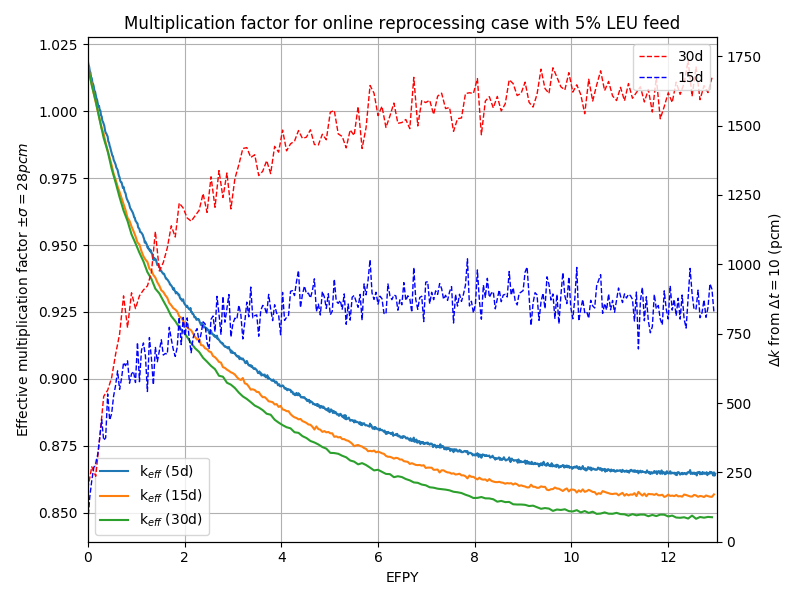

Keff drop over period 0.172663
Time interval 4735.000000 days


In [51]:
print(len(k_bds_5d[::6]), len(k_bds_15d[:-56]), len(k_bds_30[:-5]))
print(len(k_bds_5d[::3]), len(k_bds_15d[:-56]))
# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax1 = fig_keff_1.subplots()
ax1.grid(True)
#ax1.plot(days_5, k_bds_5, '-', label='k$_{eff}$ (3d)', linewidth=1.5) # at BDS (feed LEU 19.79%)
ax1.plot(days_5d, k_bds_5d, '-', label='k$_{eff}$ (5d)', linewidth=1.5)
ax1.plot(days_15d[:-56], k_bds_15d[:-56], '-', label='k$_{eff}$ (15d)', linewidth=1.5)
ax1.plot(days_30[:-5], k_bds_30[:-5], '-', label='k$_{eff}$ (30d)', linewidth=1.5)
#ax.plot(days_5, k_bds_5, '-', label='k$_{eff}$ at BDS (feed LEU 5%)', linewidth=1.5)
#ax.plot(days2, k_eds, '-', label='k$_{eff}$ at EDS', linewidth=1.5)

#ax.fill_between(days, k_bds-k_bds_err, k_bds+k_bds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(days2, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.legend(loc=3)
ax1.set_ylabel(r'Effective multiplication factor $\pm\sigma=28pcm$')
ax1.set_xlabel('EFPY')
ax1.set_title('Multiplication factor for online reprocessing case with 5% LEU feed')
ax1.set_xlim(0,13)
#ax1.set_ylim([0.91, 0.94])

ax2 = ax1.twinx()
ax2.set_ylabel(r'$\Delta k$ from $\Delta t = 10$ (pcm)')
ax2.plot(days_30[:-5], 1e+5*(k_bds_5d[::6] - k_bds_30[:-5]), '--', color='red', label='30d', linewidth=1)
ax2.plot(days_15d[:-56], 1e+5*(k_bds_5d[::3] - k_bds_15d[:-56]), '--', color='blue', label='15d', linewidth=1)
ax2.legend(loc=1)
ax2.set_ylim(0)

fig_keff_1.tight_layout()
fig_keff_1.show()
#fig_keff_1.savefig('../../../saltproc/examples/gallery/full_core/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_rem_cases.png',bbox_inches='tight', dpi=700)
print("Keff drop over period %f" %(k_bds_30[0]-k_eds_30[-1]))
print("Time interval %f days" %(days_5d[-1]*365))

In [ ]:
keff = merge(k_bds, k_eds)
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)

keff_5 = merge(k_bds_5, k_eds_5)
efpd_5 = merge(days_5, days2_5)
err_5 = merge(k_bds_err_5, k_eds_err_5)


# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd, keff, '-', label='LEU 19.79%', linewidth=0.5, markerfacecolor="None")
ax.plot(efpd_5, keff_5, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None", alpha=0.8)
ax.plot(days_no/365.0, keff_no, '-', label='no removal/feed', linewidth=1.5, markerfacecolor="None")

ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
ax.set_ylim([0.75, 1.018])
#ax.set_xlim(125, 196.0)
# zoomed 2
#ax.set_xlim(367, 471.0)
#ax.set_ylim(0.915, 0.963)
# zoomed 1
#ax.set_xlim(0, 104.0)
#ax.set_ylim(0.98, 1.018)

fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_3.png',bbox_inches='tight', dpi=700)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_zoomed_1.png',bbox_inches='tight', dpi=700)
print(k_bds[0])
print(keff_5[0], keff_5[-1])
print(keff[0], keff[-1])